Spectral clustering [25 points]
1. (10 points) For the following data (two moons), give one method that will successfully separate the two moons? Explain your rationale.
3
2. (15 points) Political blogs dataset. We will study a political blogs dataset ﬁrst compiled for the paper Lada A. Adamic and Natalie Glance, “The political blogosphere and the 2004 US Election”, in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005). The dataset nodes.txt contains a graph with n = 1490 vertices (“nodes”) corresponding to political blogs. Each vertex has a 0-1 label (in the 3rd column) corresponding to the political orientation of that blog. We will consider this as the true label and try to reconstruct the true label from the graph using the spectral clustering on the graph. The dataset edges.txt contains edges between the vertices. You may remove isolated nodes (nodes that are not connected any other nodes).
(a) (10 points) Assume the number of clusters to be estimated is k = 2. Using spectral clustering to ﬁnd the 2 clusters. Compare the clustering results with the true labels. What is the false classiﬁcation rate (the percentage of nodes that are classiﬁed incorrectly). It is required you implementing the algorithms yourself rather than calling from a package. (b) (5 points) You might observe the performance is not as good as you expected (given that there is no coding bugs). What do you think might be the reason for the not-so-good performance, due to the discrepancy from “theory” and “application”? Please write in your report.



In [12]:
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


def import_graph():
    # read the graph from 'play_graph.txt'
    f_path = abspath("./data/edges.txt")
    if exists(f_path):
        with open(f_path) as graph_file:
            lines = [line.split() for line in graph_file]
    return np.array(lines).astype(int)


a = import_graph()
i = a[:, 0]-1
j = a[:, 1]-1

#k=2
n = max(max(i), max(j)) + 1
print(a)
print(i)
print(j)
#v = np.ones((a.shape[0], 1)).flatten()

#A = sparse.coo_matrix((v, (i, j)), shape=(n, n))

# A = (A + np.transpose(A))/2
# D = np.diag(1/np.sqrt(np.sum(A, axis=1)).A1)
# D = np.where(np.isfinite(D), D, 0)
# L = D @ A @ D

# v, x = np.linalg.eig(L)
# x = x[:, 0:k].real
# x = x/np.repeat(np.sqrt(np.sum(x*x, axis=1).reshape(-1, 1)), k, axis=1)

# x = x[~np.any(np.isnan(x), axis=1)]

# # # k-means
# kmeans = KMeans(n_clusters=k).fit(x)
# c_idx = kmeans.labels_
# plt.scatter(x[:,0],x[:,1], c=c_idx, cmap='rainbow', alpha=0.7, edgecolors='b')

[[ 267 1394]
 [ 267  483]
 [ 267 1051]
 ...
 [1133 1423]
 [1133 1408]
 [1133 1152]]
[ 266  266  266 ... 1132 1132 1132]
[1393  482 1050 ... 1422 1407 1151]


In [22]:
unique, counts = np.unique(c_idx, return_counts=True)

results = np.asarray((unique, counts)).T
results

array([[   0, 1218],
       [   1,    6]], dtype=int64)

In [23]:
import pandas as pd
nodes = pd.read_csv('./data/nodes.txt', sep='\t',header=None,names= ['Idx','Blog_Url','Label','Blog_Name']).reset_index(drop=True)
nodes.groupby('Label')['Label'].count()

Label
0.0    756
1.0    732
Name: Label, dtype: int64

4 PCA: Food consumption in European area [25 points]
The data food-consumption.csv contains 16 countries in the European area and their consumption for 20 food items, such as tea, jam, coﬀee, yoghurt, and others. There are some missing data entries: you may remove the rows “Sweden”, “Finland”, and “Spain”. The goal is to perform PCA analysis on the data, i.e., ﬁnd a way to perform linear combinations of features across all 20 food-item consumptions, for each country. If we extract two principal components, that means we use two singular vectors that correspond to the largest singular values of the data matrix, in combining features.
1. (5 points) Write down the set-up of PCA for this setting. Explain how the data matrix is set-up in this case (e.g., each dimension of the matrix correspond to what.) Explain in words how PCA is performed in this setting.
2. (5 points) Suppose we aim to ﬁnd top k principal components. Write down the mathematical optimization problem involved for solving this problem. Explain the procedure to ﬁnd the top k principal components in performing PCA.

3. (7 points) Find the top two principal direction vectors (i.e., the eigenvectors of C) for the dataset and plot them (plot a value of the vector as a one-dimensional function). Describe do you see any pattern. You may either use a package or write your own code.
4. (8 points) Now project each data point using the top two principal component vectors (thus now each data point will be represented using a two-dimensional vector). Draw a scatter plot of two-dimensional reduced representation for each country. What pattern can you observe? You may use use a package or write your own code.


In [226]:
#Read in dataframe and filter out the following countries ['Sweden','Finland','Spain']
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
pd_food_cons = pd.read_csv('./data/food-consumption.csv')
filter_countries = ['Sweden','Finland','Spain']
pd_food_cons = pd_food_cons[~pd_food_cons.Country.isin(filter_countries)].reset_index()
pd_food_cons = pd_food_cons.drop(['index'],axis=1)
pd_food_cons = pd_food_cons.reset_index()

#From the output we can see that the data is all scaled with the same units, meaning it's a good candidate
#for measuring the covariance matrix instead of using the correlation matrix
pd_pca = pd_food_cons.drop(['Country'],axis=1)

In [211]:
#Import pca library to find the top two principal direction vectors
pca = PCA(n_components=2)
X_pca = pca.fit_transform(pd_pca)
print(pd_pca.shape)
print(X_pca.shape)

(13, 21)
(13, 2)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

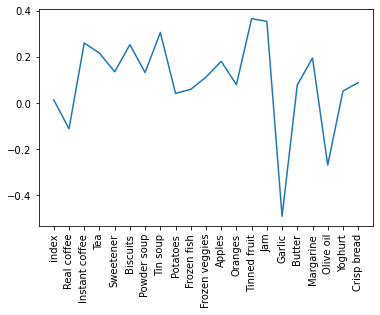

In [271]:
plt.plot(pd_pca.columns,pca.components_[0])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

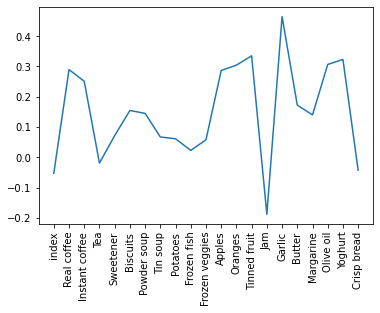

In [272]:
plt.plot(pd_pca.columns,pca.components_[1])
plt.xticks(rotation=90)

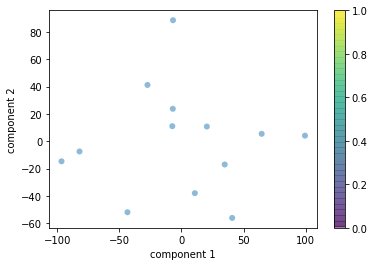

In [213]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='none',cmap=plt.cm.get_cmap('Accent', 10),alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [238]:
X_concat_df = pd.concat([X_final_df,pd_food_cons])
X_concat_df = X_concat_df.drop(['index'],axis=1)
X_concat_df.reset_index()

,index,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,0,Germany,77.140672,51.311557,84.115615,20.362509,67.123155,55.860068,25.259726,12.498288,...,76.306639,75.355540,54.603670,61.555633,38.592378,80.751330,76.935866,52.498715,26.830397,22.405815
1,1,Italy,83.370973,20.149000,62.383124,5.279843,38.460989,39.761029,-7.234498,7.175140,...,52.628464,61.717583,11.087290,28.829175,80.513344,69.655407,54.482070,74.536031,15.734314,14.201416
2,2,France,91.314118,46.545480,73.243190,16.113204,59.771771,53.994259,12.716526,12.396357,...,76.415948,80.828703,47.341570,38.975773,76.213958,82.280313,71.911040,74.704311,34.222180,16.921918
3,3,Holland,70.636217,61.419891,93.725044,25.913708,77.426873,60.879919,38.368412,13.983449,...,82.722033,77.215857,68.924983,78.131347,14.409982,83.256518,84.758753,38.962789,27.347371,26.501329
4,4,Belgium,80.339445,44.169785,78.123854,16.645688,60.156884,52.250414,16.798283,11.373741,...,71.379859,73.242564,44.549417,51.701291,52.380403,78.640521,71.576874,60.072195,25.504890,19.959050
5,5,Luxembourg,102.709515,63.762044,76.778044,22.265911,72.276242,63.557951,22.169089,16.136577,...,93.684554,96.846822,70.702535,37.332326,88.080820,92.031117,82.530989,83.667983,50.552940,16.708323
6,6,England,66.331374,70.127339,101.261503,30.504839,86.011217,65.262648,48.916736,15.332721,...,88.614668,79.560603,81.201982,90.684163,-3.356406,85.731295,91.341292,29.152264,28.685168,29.613986
7,7,Portugal,82.920839,14.584869,59.394933,2.816397,33.694068,36.816025,-12.141279,6.140506,...,47.959744,58.389089,3.389056,25.062982,84.309627,67.292920,50.660910,76.244670,12.678860,13.236350
8,8,Austria,66.168411,19.004152,71.537628,7.286976,41.320972,38.383202,1.557407,6.040531,...,46.839604,51.249955,10.288394,50.799150,40.902625,64.994226,55.754500,50.511298,3.342935,19.476107
9,9,Switzerland,83.973419,47.463460,77.969940,17.609123,62.222719,54.145620,17.773745,12.167602,...,75.093776,77.138268,48.951858,49.454113,58.082975,80.860716,73.433624,63.858425,29.628653,19.453091


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

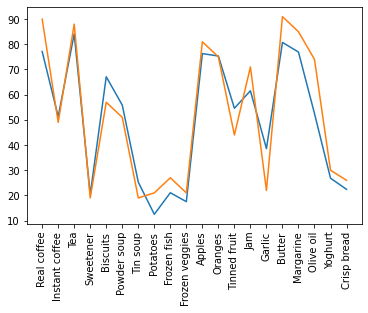

In [267]:
germany_transformed = np.array(X_concat_df.loc[X_concat_df['Country'] == 'Germany'].iloc[:, 1:])
plt.plot(X_concat_df.columns[1:],germany_transformed[0])
plt.plot(X_concat_df.columns[1:],germany_transformed[1])
plt.xticks(rotation=90)